# Lab 4-2: Load Data

Author: Seungjae Lee (이승재)

<div class="alert alert-warning">
    We use elemental PyTorch to implement linear regression here. However, in most actual applications, abstractions such as <code>nn.Module</code> or <code>nn.Linear</code> are used.
</div>

## Slicing 1D Array

In [1]:
nums = [0, 1, 2, 3, 4]

In [2]:
print(nums)

[0, 1, 2, 3, 4]


index 2에서 4 전까지 가져와라. (앞 포함, 뒤 비포함)

In [3]:
print(nums[2:4])

[2, 3]


index 2부터 다 가져와라.

In [4]:
print(nums[2:])

[2, 3, 4]


index 2 전까지 가져와라. (역시 뒤는 비포함)

In [5]:
print(nums[:2])

[0, 1]


전부 가져와라

In [6]:
print(nums[:])

[0, 1, 2, 3, 4]


마지막 index 전까지 가져와라. (뒤는 비포함!)

In [7]:
print(nums[:-1])

[0, 1, 2, 3]


assign 도 가능!

In [8]:
nums[2:4] = [8, 9]

In [9]:
print(nums)

[0, 1, 8, 9, 4]


## Slicing 2D Array

In [10]:
import numpy as np

In [11]:
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

In [12]:
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [13]:
b[:, 1]

array([ 2,  6, 10])

In [18]:
b[-1] # 뒤에서 첫 번째

array([ 9, 10, 11, 12])

In [19]:
b[-1, :]

array([ 9, 10, 11, 12])

In [20]:
b[-1, ...]

array([ 9, 10, 11, 12])

In [21]:
b[0:2, :]

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

## Loading Data from `.csv` file

In [22]:
import numpy as np

In [23]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)

In [24]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [25]:
print(x_data.shape) # x_data shape
print(len(x_data))  # x_data 길이
print(x_data[:5])   # 첫 다섯 개

(25, 3)
25
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]]


In [26]:
print(y_data.shape) # y_data shape
print(len(y_data))  # y_data 길이
print(y_data[:5])   # 첫 다섯 개

(25, 1)
25
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]]


## Imports

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [28]:
# For reproducibility
torch.manual_seed(1)

## Low-level Implementation

In [29]:
# 데이터
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)
loss_rec = []

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train.matmul(W) + b # or .mm or @

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))
    
    loss_rec.append(cost.item())

Epoch    0/20 Cost: 26811.960938
Epoch    1/20 Cost: 9920.529297
Epoch    2/20 Cost: 3675.298828
Epoch    3/20 Cost: 1366.260620
Epoch    4/20 Cost: 512.542480
Epoch    5/20 Cost: 196.896606
Epoch    6/20 Cost: 80.190994
Epoch    7/20 Cost: 37.038696
Epoch    8/20 Cost: 21.081335
Epoch    9/20 Cost: 15.178759
Epoch   10/20 Cost: 12.993677
Epoch   11/20 Cost: 12.183028
Epoch   12/20 Cost: 11.880536
Epoch   13/20 Cost: 11.765964
Epoch   14/20 Cost: 11.720855
Epoch   15/20 Cost: 11.701437
Epoch   16/20 Cost: 11.691509
Epoch   17/20 Cost: 11.685122
Epoch   18/20 Cost: 11.680006
Epoch   19/20 Cost: 11.675371
Epoch   20/20 Cost: 11.670942


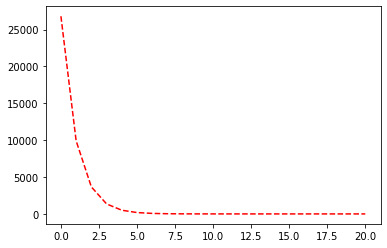

In [34]:
import matplotlib.pyplot as plt

plt.plot(range(21), loss_rec, 'r--')
plt.show()

## High-level Implementation with `nn.Module`

In [35]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [36]:
# 데이터
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
# 모델 초기화
model = MultivariateLinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 28693.488281
Epoch    1/20 Cost: 10618.750000
Epoch    2/20 Cost: 3936.014648
Epoch    3/20 Cost: 1465.219482
Epoch    4/20 Cost: 551.693665
Epoch    5/20 Cost: 213.934662
Epoch    6/20 Cost: 89.052185
Epoch    7/20 Cost: 42.875980
Epoch    8/20 Cost: 25.799665
Epoch    9/20 Cost: 19.482405
Epoch   10/20 Cost: 17.143095
Epoch   11/20 Cost: 16.274523
Epoch   12/20 Cost: 15.949729
Epoch   13/20 Cost: 15.825976
Epoch   14/20 Cost: 15.776578
Epoch   15/20 Cost: 15.754668
Epoch   16/20 Cost: 15.742909
Epoch   17/20 Cost: 15.734905
Epoch   18/20 Cost: 15.728312
Epoch   19/20 Cost: 15.722223
Epoch   20/20 Cost: 15.716335


## Dataset and DataLoader

<div class="alert alert-warning">
    pandas 기초지식이 필요할 것 같다
</div>

너무 데이터가 크면 `x_data`, `y_data` 를 전부 다 가져오지 말고, 필요한 배치만 가져올 수 밖에 없다.

[PyTorch Data Loading and Processing tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#iterating-through-the-dataset)

minibatch 구현해봄

In [37]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = x_data
        self.y_data = y_data
        
    def __len__(self):
        return len(self.x_data)

    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx]) 
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

dataset = CustomDataset()

In [40]:
dataset.x_data

array([[ 73.,  80.,  75.],
       [ 93.,  88.,  93.],
       [ 89.,  91.,  90.],
       [ 96.,  98., 100.],
       [ 73.,  66.,  70.],
       [ 53.,  46.,  55.],
       [ 69.,  74.,  77.],
       [ 47.,  56.,  60.],
       [ 87.,  79.,  90.],
       [ 79.,  70.,  88.],
       [ 69.,  70.,  73.],
       [ 70.,  65.,  74.],
       [ 93.,  95.,  91.],
       [ 79.,  80.,  73.],
       [ 70.,  73.,  78.],
       [ 93.,  89.,  96.],
       [ 78.,  75.,  68.],
       [ 81.,  90.,  93.],
       [ 88.,  92.,  86.],
       [ 78.,  83.,  77.],
       [ 82.,  86.,  90.],
       [ 86.,  82.,  89.],
       [ 78.,  83.,  85.],
       [ 76.,  83.,  71.],
       [ 96.,  93.,  95.]], dtype=float32)

In [58]:
from torch.utils.data import DataLoader

bs = 8
dataloader = DataLoader(dataset, batch_size=bs, shuffle=True)

```
batch_size=2
```
각 minibatch의 크기; 통상적으로 2의 제곱수로 설정한다 (16, 32, 64, 128, 256, 512...)

```
shuffle=True
```
Epoch 마다 데이터셋을 섞어서, 데이터가 학습되는 순서를 바꾼다.

In [61]:
nb_epochs = 20 
cost_rec = []
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples 
        # H(x) 계산 
        prediction = model(x_train) 
        # cost 계산 
        cost = F.mse_loss(prediction, y_train)
        # cost로 H(x) 개선 
        optimizer.zero_grad() 
        cost.backward() 
        optimizer.step()
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item() 
        ))
        cost_rec.append(cost.item())

Epoch    0/20 Batch 1/4 Cost: 8.647509
Epoch    0/20 Batch 2/4 Cost: 18.588985
Epoch    0/20 Batch 3/4 Cost: 11.712983
Epoch    0/20 Batch 4/4 Cost: 0.084726
Epoch    1/20 Batch 1/4 Cost: 18.019211
Epoch    1/20 Batch 2/4 Cost: 8.549113
Epoch    1/20 Batch 3/4 Cost: 9.792729
Epoch    1/20 Batch 4/4 Cost: 13.628734
Epoch    2/20 Batch 1/4 Cost: 15.688975
Epoch    2/20 Batch 2/4 Cost: 12.945750
Epoch    2/20 Batch 3/4 Cost: 9.132137
Epoch    2/20 Batch 4/4 Cost: 3.033357
Epoch    3/20 Batch 1/4 Cost: 7.702037
Epoch    3/20 Batch 2/4 Cost: 10.951144
Epoch    3/20 Batch 3/4 Cost: 16.755348
Epoch    3/20 Batch 4/4 Cost: 5.273042
Epoch    4/20 Batch 1/4 Cost: 3.211180
Epoch    4/20 Batch 2/4 Cost: 2.992927
Epoch    4/20 Batch 3/4 Cost: 26.427687
Epoch    4/20 Batch 4/4 Cost: 36.089596
Epoch    5/20 Batch 1/4 Cost: 16.707735
Epoch    5/20 Batch 2/4 Cost: 12.489838
Epoch    5/20 Batch 3/4 Cost: 9.198650
Epoch    5/20 Batch 4/4 Cost: 16.043119
Epoch    6/20 Batch 1/4 Cost: 17.486210
Epoch    6/

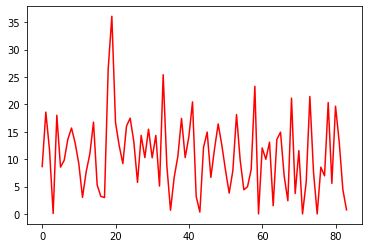

In [64]:
plt.plot(np.arange(len(cost_rec)), cost_rec, 'r-')
plt.show()